# CNN for acoustic scene classfication: my home

Date: March 23, 2019

Neural network: input MFSCs to CNN

## Preparing data set for CNN

In [4]:
DATASET_FOLDER = '../dataset/data_my_home'

%run ../oscilloscope/script/dataset.py
%matplotlib inline

ds = DataSet(DATASET_FOLDER)
train_data, train_labels, test_data, test_labels = ds.generate(update=False)['mfsc']
shape = ds.shape
class_labels = ds.class_labels
class_labels

['chat',
 'reading',
 'watching_tv',
 'cocking',
 'hamster',
 'silence',
 'vacuum_cleaner',
 'shower',
 'washing_machine',
 'doing_the_dishes',
 'walking',
 'piano',
 'stairs',
 'snack']

((1120, 64, 40, 1), (560, 64, 40, 1))

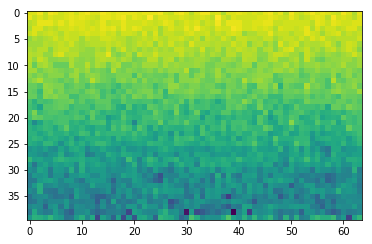

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(np.rot90(train_data[0].reshape(ds.shape)))
train_data.shape, test_data.shape

### CNN model

In [11]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(*shape, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(class_labels), activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 38, 8)         80        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 19, 8)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 31, 19, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 17, 16)        1168      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 8, 16)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 8, 16)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 6, 32)         4640      
__________

In [12]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## Training CNN

In [13]:
EPOCHS = 70
history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_data=(test_data, test_labels))

Train on 1120 samples, validate on 560 samples
Epoch 1/70
1120/1120 [==============================] - 37s 33ms/step - loss: 4.7016 - acc: 0.1009 - val_loss: 2.4661 - val_acc: 0.1375
Epoch 2/70
1120/1120 [==============================] - 35s 31ms/step - loss: 2.4351 - acc: 0.1732 - val_loss: 2.3290 - val_acc: 0.2232
Epoch 3/70
1120/1120 [==============================] - 35s 31ms/step - loss: 2.3145 - acc: 0.2161 - val_loss: 2.2966 - val_acc: 0.2893
Epoch 4/70
1120/1120 [==============================] - 35s 31ms/step - loss: 2.1447 - acc: 0.2688 - val_loss: 2.0629 - val_acc: 0.3161
Epoch 5/70
1120/1120 [==============================] - 34s 30ms/step - loss: 2.0201 - acc: 0.3027 - val_loss: 2.0005 - val_acc: 0.4214
Epoch 6/70
1120/1120 [==============================] - 34s 31ms/step - loss: 1.8876 - acc: 0.3366 - val_loss: 1.9482 - val_acc: 0.4107
Epoch 7/70
1120/1120 [==============================] - 34s 31ms/step - loss: 1.8029 - acc: 0.3589 - val_loss: 1.8346 - val_acc: 0.3982
E

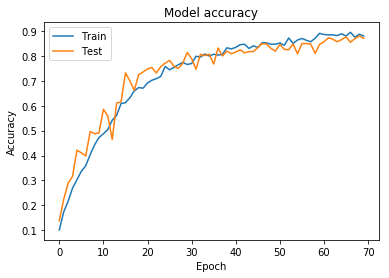

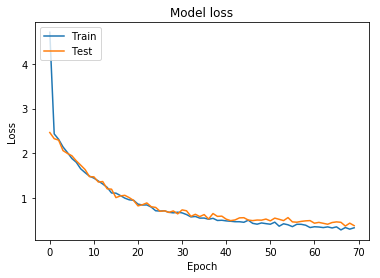

In [14]:
plot_accuracy(history)
plot_loss(history)

## Save the model

In [16]:
import datetime

dt = datetime.datetime.today().strftime('%Y%m%d%H%M%S')
filename = DATASET_FOLDER + '/my_home_cnn_{}.h5'.format(dt)
model.save(filename)

## Load the model

In [17]:
del model
model = models.load_model(filename)

## Confirmation

In [18]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_data)

In [19]:
class_labels

['chat',
 'reading',
 'watching_tv',
 'cocking',
 'hamster',
 'silence',
 'vacuum_cleaner',
 'shower',
 'washing_machine',
 'doing_the_dishes',
 'walking',
 'piano',
 'stairs',
 'snack']

In [20]:
(activations[-1][:10]*100).astype(int)

array([[  0,   1,   0,   0,   7,  71,   0,   0,   0,   0,   9,   0,   7,
          0],
       [  0,   0,   0,   0,   0,   0, 100,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  99,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0, 100,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   9,   0,   0,   0,   0,   0,  90,   0,   0,   0,
          0],
       [  0,   0,  92,   0,   0,   0,   0,   0,   0,   0,   0,   7,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 100,   0,
          0],
       [ 10,   0,  11,   1,   0,   0,   0,   0,  63,   0,   0,   2,   7,
          0],
       [  1,   1,   1,   1,  10,  62,   0,   0,   1,   0,   8,   1,   9,
          0],
       [  0,   0,   0,   0,  99,   0,   0,   0,   0,   0,   0,   0,   0,
          0]])

In [21]:
test_labels[:10].astype(int)

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

'watching_tv'

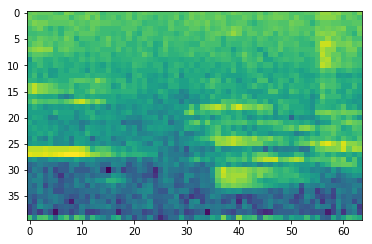

In [22]:
image_number = 5

plt.imshow(np.rot90(test_data[image_number,:,:,0]))
class_labels[np.argmax(test_labels[image_number])]

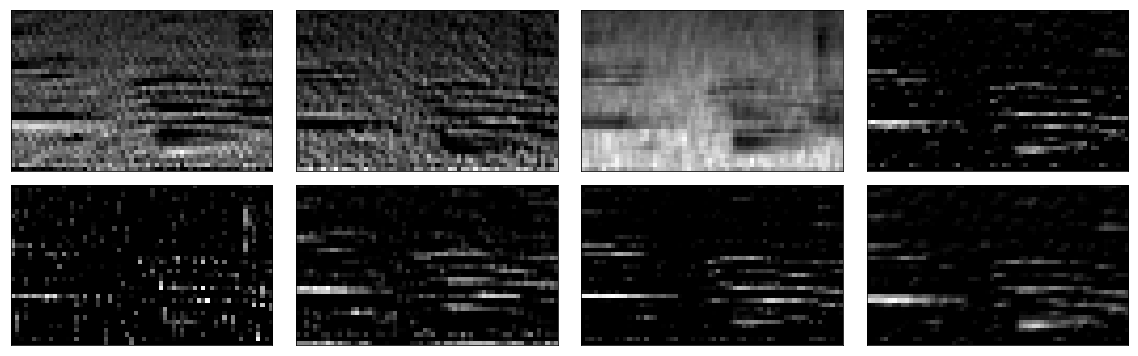

In [23]:
plot_layer(activations, image_number, 0, 4)

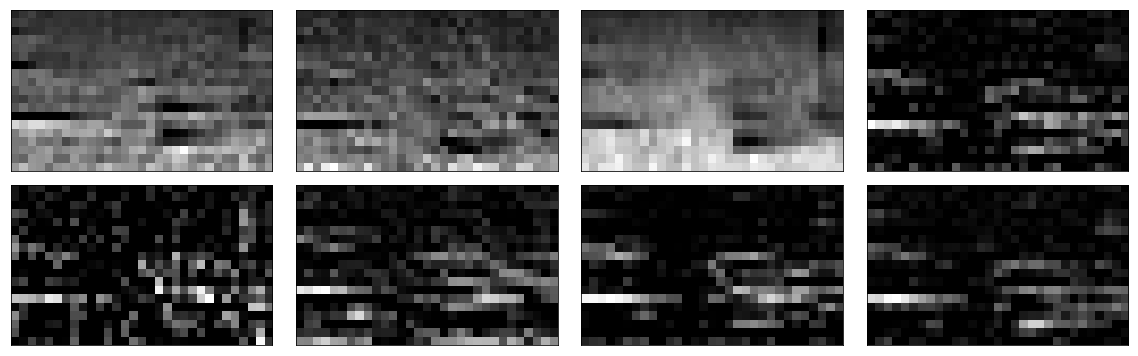

In [24]:
plot_layer(activations, image_number, 1, 4)

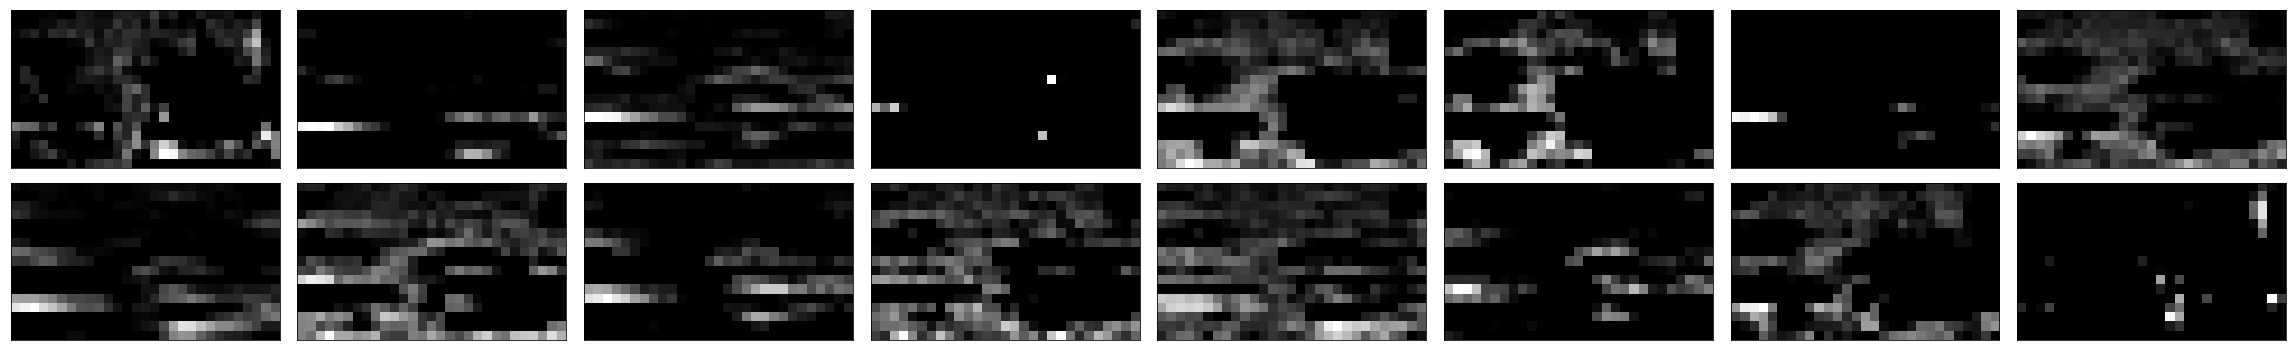

In [25]:
plot_layer(activations, image_number, 3, 8)

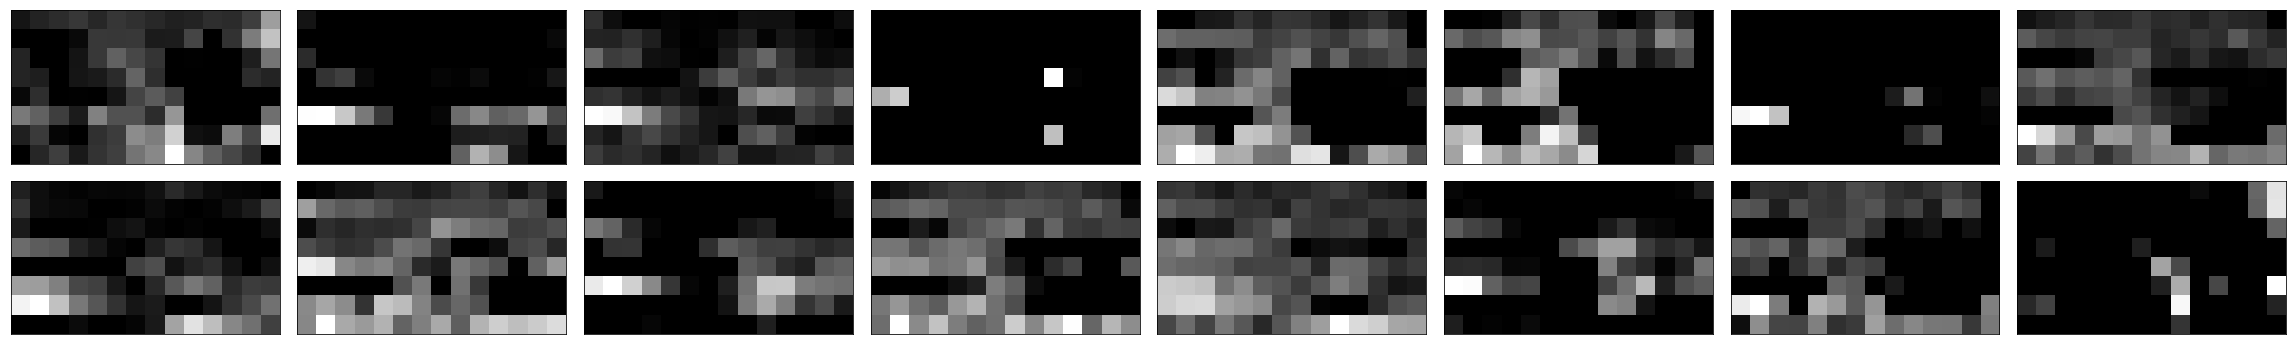

In [26]:
plot_layer(activations, image_number, 4, 8)

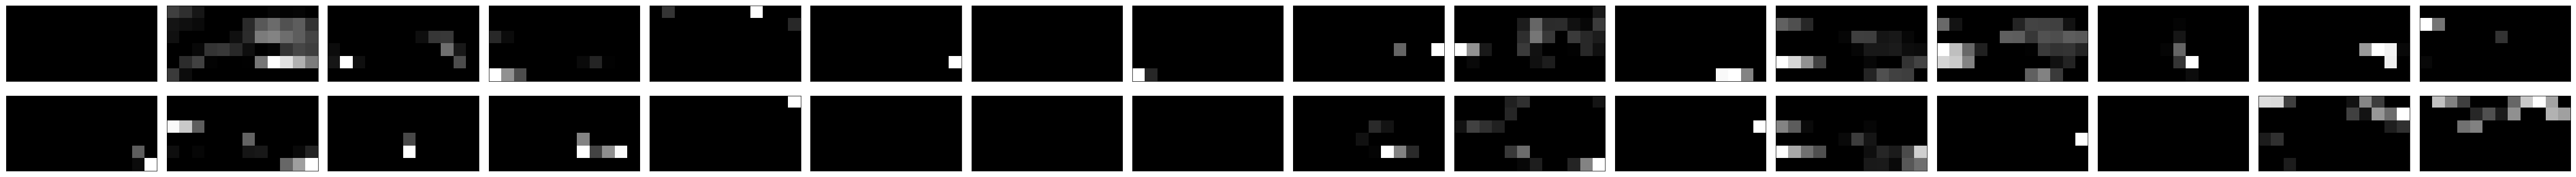

In [27]:
plot_layer(activations, image_number, 6, 16)

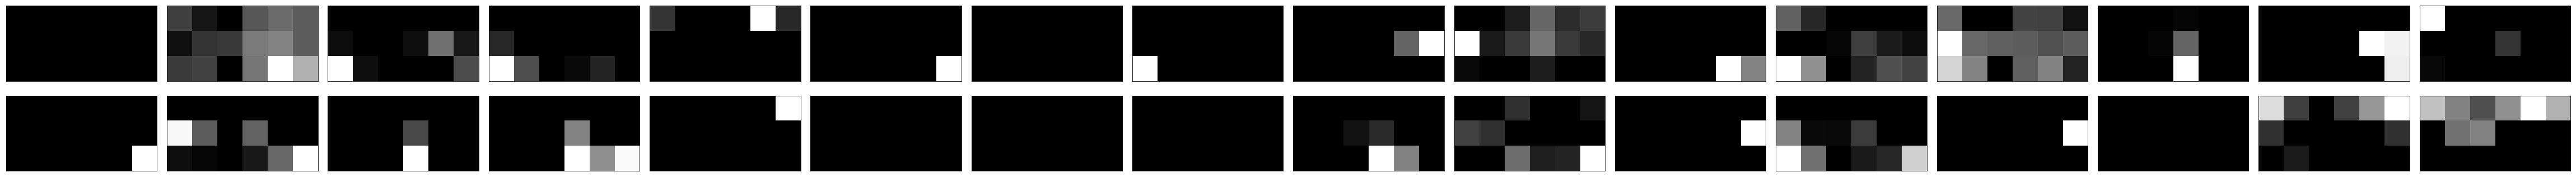

In [28]:
plot_layer(activations, image_number, 7, 16)